## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

---

## Get the Data

In [5]:
df = pd.read_csv('USA_Housing.csv')     

**Checking the head of customers, and its info() and describe() methods.**

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


---

## Exploratory Data Analysis

**Finding the correlation of the columsn using pairplot and corr() functions**

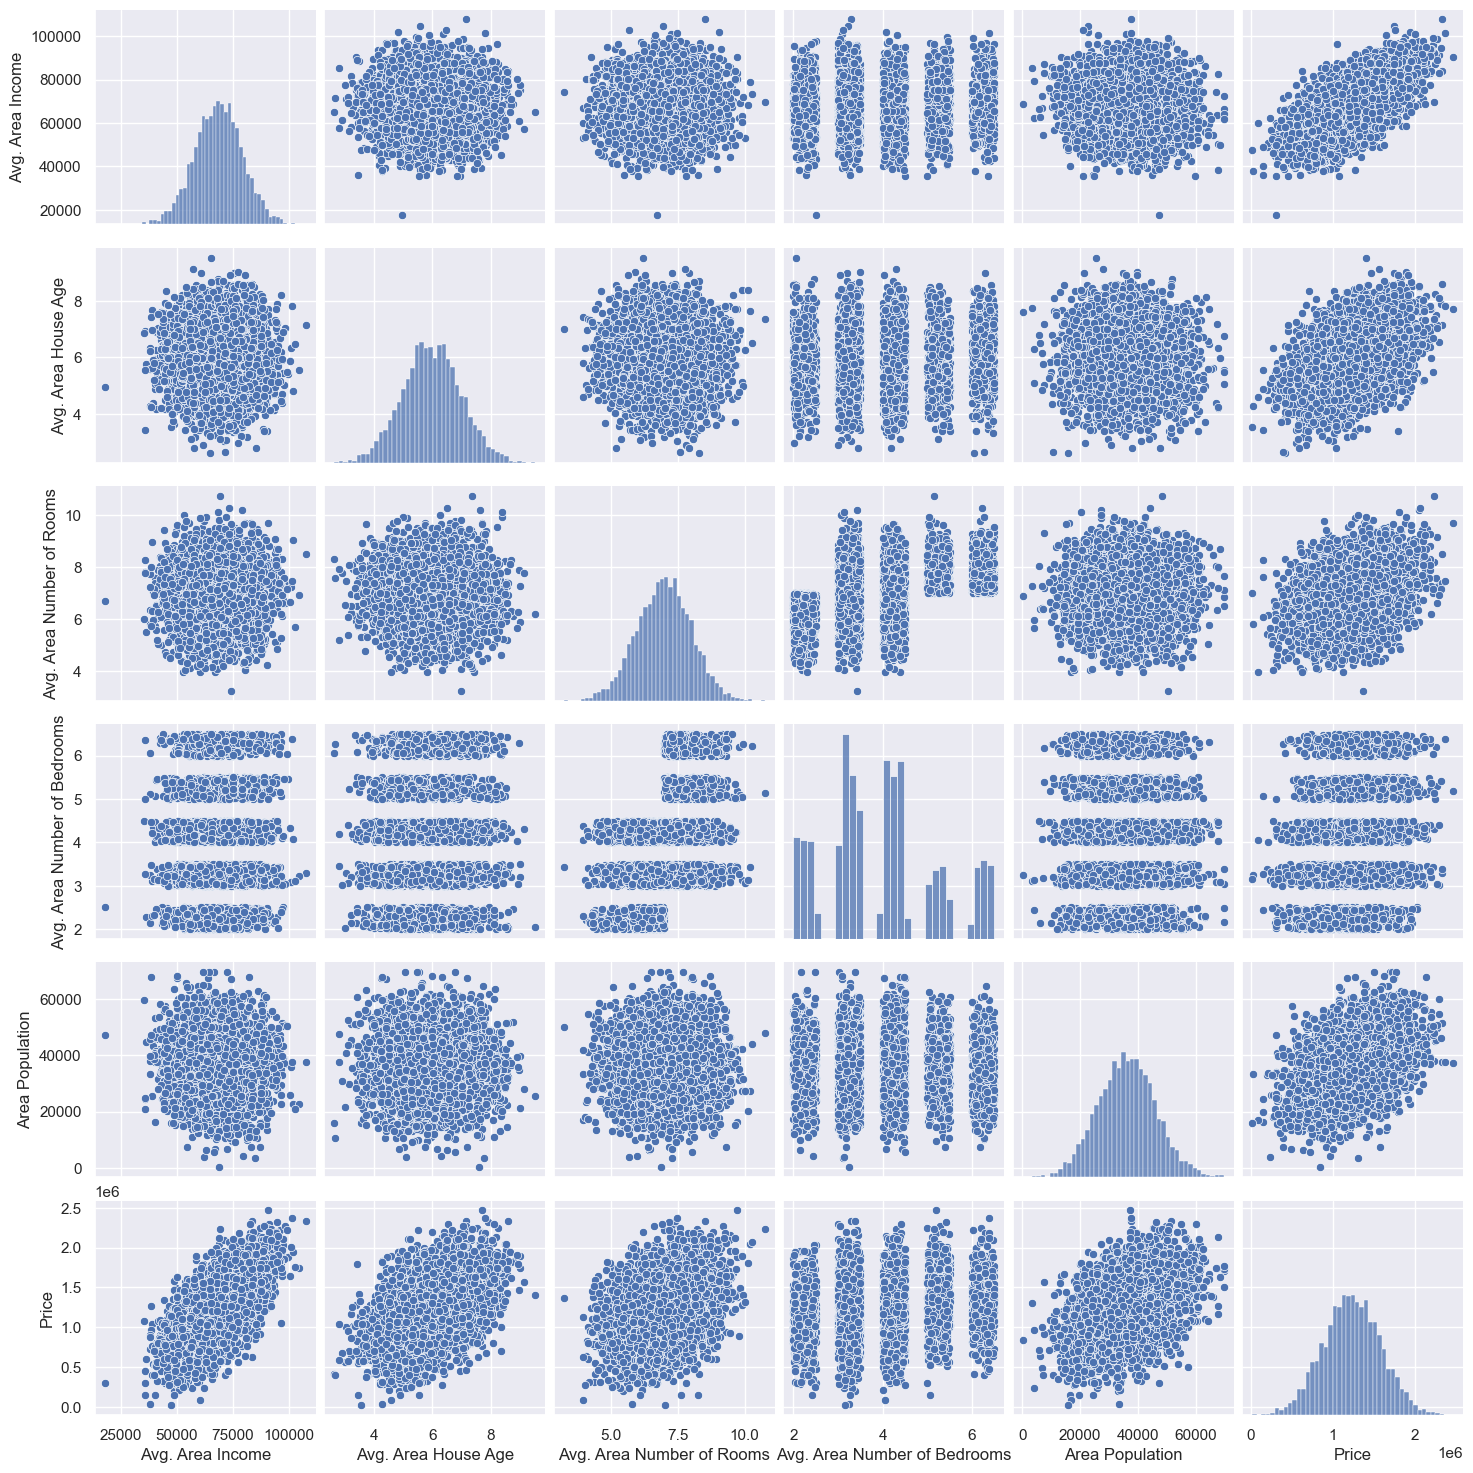

In [20]:
sns.pairplot(numeric_df)

<Axes: >

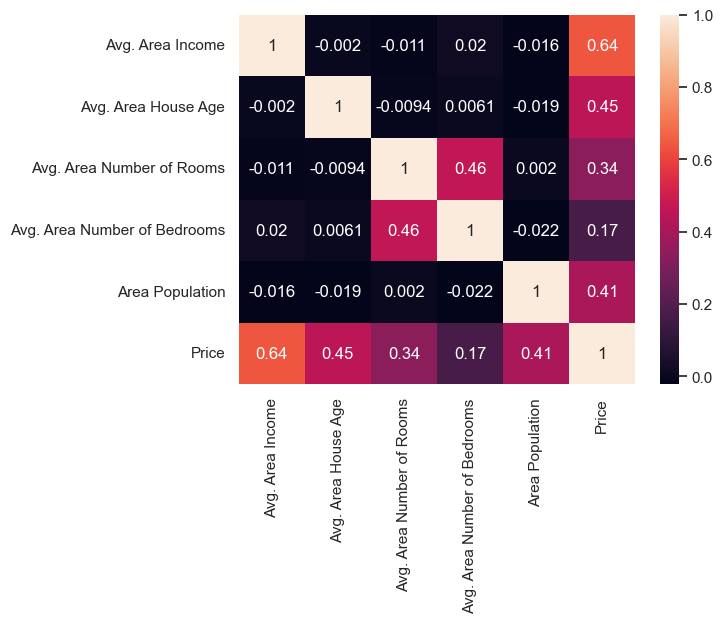

In [22]:
numericdf = df.select_dtypes(include = [float,int])
sns.heatmap(numericdf.corr(), annot = True)

**Its observed that Average area income and Price correlate the most so linear line is plotted over the data using lmplot**

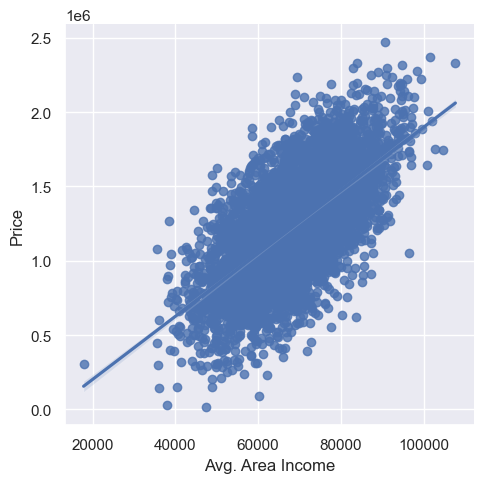

In [17]:
sns.set(color_codes=True)
sns.lmplot(x='Avg. Area Income', y='Price',data=df)

---

## Training and Testing Data

In [23]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [33]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [34]:
y= df['Price']

**Splitting the data into train and test sets**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

---

## Training the Model

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm = LinearRegression()

In [39]:
lm.fit(X_train, y_train )

LinearRegression()

**Print out the coefficients of the model**

In [40]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(coef_df)

                                Coefficient
Avg. Area Income                  21.617635
Avg. Area House Age           165221.119872
Avg. Area Number of Rooms     121405.376596
Avg. Area Number of Bedrooms    1318.718783
Area Population                   15.225196


---

## Predicting Test Data

In [41]:
predictions = lm.predict(X_test)

**Visualizing the predictions on a scatter plot with the linear line**

Text(0.5, 0, 'Y test')

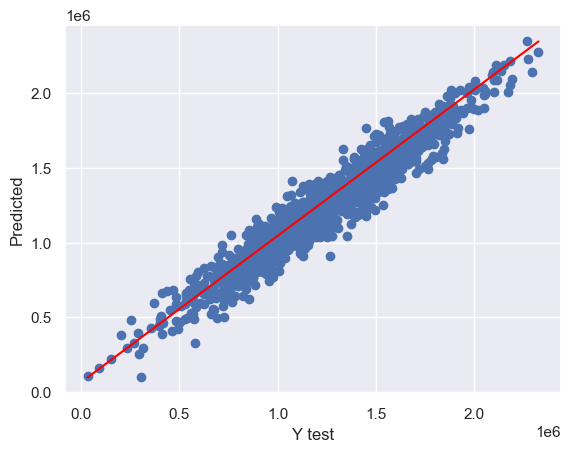

In [70]:
plt.pyplot.scatter(y_test, predictions)
plt.pyplot.plot([y_test.min(),y_test.max()],[predictions.min(),predictions.max()],color = 'red')
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Y test')

**Visualizing how Normal the data is between y_test and predictions**

C:\Users\muday\AppData\Local\Temp\ipykernel_11512\2836652643.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions,bins = 50)


<Axes: xlabel='Price', ylabel='Density'>

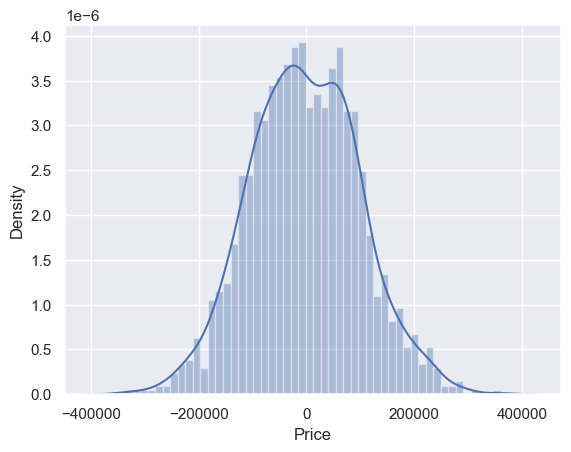

In [66]:
sns.distplot(y_test-predictions,bins = 50)

---

## Evaluating the Model

In [71]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 81257.55795855928
MSE: 10169125565.897568
RMSE: 100842.0823163503


In [78]:
# R-squared for model evaluation
r2 = metrics.r2_score(y_test, predictions)
print("R-squared:", r2)

R-squared: 0.9185060945363626


***The model is about 92 percent accurate***

---

## Predictions and visualization

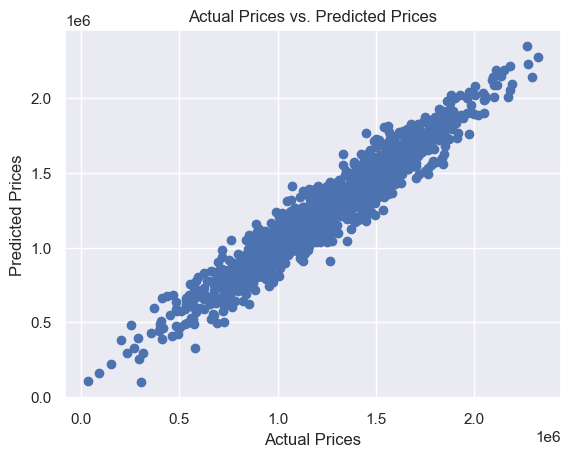

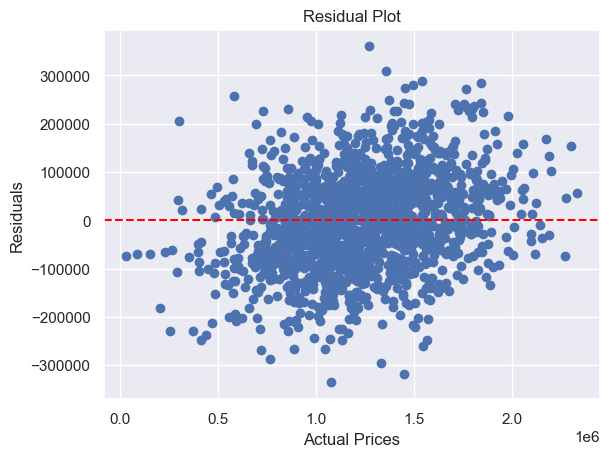

Predicted Price: 1184734.2878723196


C:\Users\muday\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [89]:
# Actual Prices vs Predicted Prices
plt.pyplot.scatter(y_test,predictions)
plt.pyplot.xlabel("Actual Prices")
plt.pyplot.ylabel("Predicted Prices")
plt.pyplot.title("Actual Prices vs. Predicted Prices")
plt.pyplot.show()

# residual plot to check the model's performance
residuals = y_test - predictions
plt.pyplot.scatter(y_test, residuals)
plt.pyplot.axhline(y=0, color='red', linestyle='--')
plt.pyplot.xlabel("Actual Prices")
plt.pyplot.ylabel("Residuals")
plt.pyplot.title("Residual Plot")
plt.pyplot.show()

# trained model to make predictions on new data and visualize the results
new_data = [[87364.6522, 4.2223, 6, 4.02, 33243.78653]]
predicted_price = lm.predict(new_data)

print("Predicted Price:", predicted_price[0])